<a href="https://colab.research.google.com/github/softmurata/colab_notebooks/blob/main/instructionpix/attendandexcite_huggingface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/huggingface/diffusers.git
!pip install transformers

In [ ]:
import torch
from diffusers import StableDiffusionAttendAndExcitePipeline
import os

model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionAttendAndExcitePipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
pipe = pipe.to("cuda")

prompt = "a cat and a frog"

# use get_indices function to find out indices of the tokens you want to alter
pipe.get_indices(prompt)

token_indices = [2, 5]
seed = 6141
generator = torch.Generator("cuda").manual_seed(seed)

images = pipe(
    prompt=prompt,
    token_indices=token_indices,
    guidance_scale=7.5,
    generator=generator,
    num_inference_steps=50,
    max_iter_to_alter=25,
).images

image = images[0]
os.makedirs("/content/images/", exist_ok=True)
image.save(f"/content/images/{prompt}_{seed}.png")

In [13]:
prompt = "an elephant with a crown"
images = pipe(
    prompt=prompt,
    token_indices=token_indices,
    guidance_scale=7.5,
    generator=generator,
    num_inference_steps=50,
    max_iter_to_alter=25,
).images

image = images[0]
image.save(f"/content/images/{prompt}_{seed}.png")

  0%|          | 0/50 [00:00<?, ?it/s]

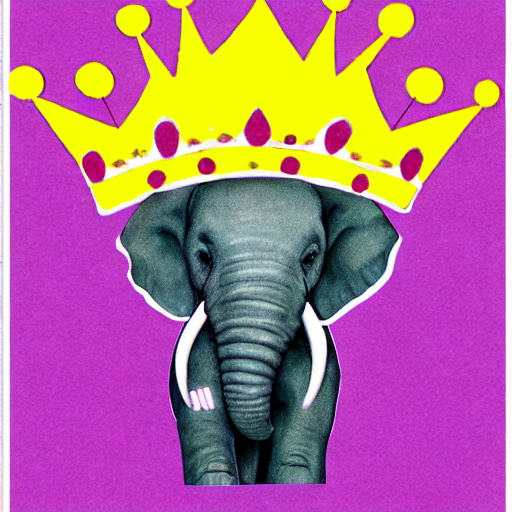

In [14]:
from PIL import Image
display(Image.open(f"/content/images/{prompt}_{seed}.png"))

In [ ]:
#@title stable diffusion v2
# stabilityai/stable-diffusion-2-base
import torch
from diffusers import StableDiffusionAttendAndExcitePipeline
import os

model_id = "stabilityai/stable-diffusion-2-base"
pipe = StableDiffusionAttendAndExcitePipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
pipe = pipe.to("cuda")

In [ ]:
os.makedirs("/content/images/", exist_ok=True)

In [ ]:
prompt = "a cat and a frog"
pipe.get_indices(prompt)

In [2]:
prompt = "a cat and a frog"

# use get_indices function to find out indices of the tokens you want to alter
pipe.get_indices(prompt)

token_indices = [2, 5]
seed = 6141
generator = torch.Generator("cuda").manual_seed(seed)

images = pipe(
    prompt=prompt,
    token_indices=token_indices,
    guidance_scale=7.5,
    generator=generator,
    num_inference_steps=50,
    max_iter_to_alter=25,
).images

image = images[0]
image.save(f"/content/images/stabv2_{prompt}_{seed}.png")

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


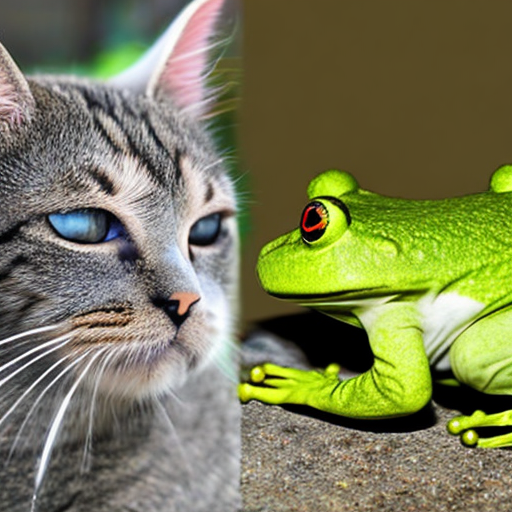

In [3]:
from PIL import Image
display(Image.open(f"/content/images/stabv2_{prompt}_{seed}.png"))

In [ ]:
#@title stable diffusion v2.1
import torch
from diffusers import StableDiffusionAttendAndExcitePipeline
import os

model_id = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionAttendAndExcitePipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
pipe = pipe.to("cuda")

In [2]:
prompt = "a cat and a frog"

# use get_indices function to find out indices of the tokens you want to alter
pipe.get_indices(prompt)

token_indices = [2, 5]
seed = 6141
generator = torch.Generator("cuda").manual_seed(seed)

images = pipe(
    prompt=prompt,
    token_indices=token_indices,
    guidance_scale=7.5,
    generator=generator,
    num_inference_steps=50,
    max_iter_to_alter=25,
).images

image = images[0]
image.save(f"/content/images/stabv21_{prompt}_{seed}.png")

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


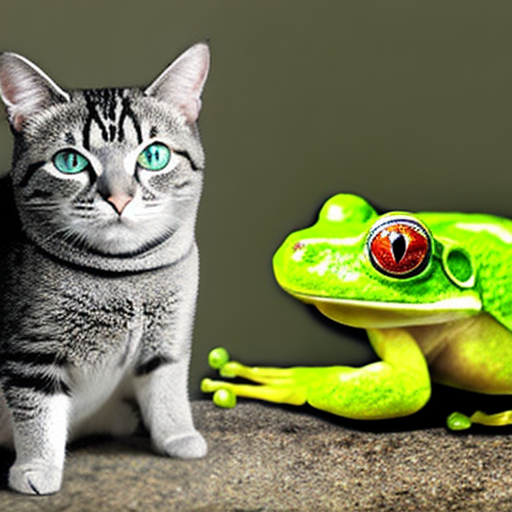

In [3]:
from PIL import Image
display(Image.open(f"/content/images/stabv21_{prompt}_{seed}.png"))

In [ ]:
#@title dreambooth or lora + attendandexcite
# stable diffusion v2のdreamboothとかloraあたりを試して読み込ませればいけそう